# Configuration


In [29]:
### PREREQUISTIES
### (many used only in one notebook...)

import os
import pandas as pd
import numpy as np
import pickle
import math
import random
import sys # to use your own functions
import io
import csv
from urllib.request import urlopen

import matplotlib.pyplot as plt

from scipy import stats

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

import sddk

In [30]:
conf = sddk.configure("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ········
connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [5]:
### authorize google sheets
# to access our gsheet with data overview & metadata, you need a Google Service Account json file
# (see google-auth python package documentation to start with)
# I have mine located in my personal space on sciencedata.dk, so I read it from there:

# (1) read the file and parse its content
try:
    file_data = conf[0].get("https://sciencedata.dk/files/ServiceAccountsKey.json").json()
except:
    print("cannot find file ServiceAccountsKey.json")
# (2) transform the content into crendentials object
credentials = service_account.Credentials.from_service_account_info(file_data)
# (3) specify your usage of the credentials
scoped_credentials = credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive'])
# (4) use the constrained credentials for authentication of gspread package
gc = gspread.Client(auth=scoped_credentials)
# (5) establish connection with spreadsheets specified by their url
sh = gc.open_by_url("https://docs.google.com/spreadsheets/d/1boQal2mG8j_FK7XpxYM7iwIwK7Q_8ErTuor2_jC333o/edit?usp=sharing")

In [6]:
sh.worksheets()

[<Worksheet 'Sheet1' id:0>,
 <Worksheet 'seshat_axial_1000BC-1CE' id:1499875099>,
 <Worksheet 'latium_data' id:2003450966>]

# Seshat "agri"

In [7]:
### this is the only data I upload here from my own location. The data are from here: https://osf.io/tqm5k/
response = conf[0].get(conf[1] + "SDAM_data/seshat/MSP_R/HistYield+.csv")
seshat_agri = pd.read_csv(io.StringIO(response.text)).T
seshat_agri.columns = seshat_agri.loc["V0"]
seshat_agri = seshat_agri[1:]
seshat_agri.head(5)

V0,Time,Latium,Paris Basin,Iceland,Upper Egypt,Niger Inland Delta,Ghanaian Coast,Susiana,Konya Plain,Yemeni Coastal Plain,...,Valley of Oaxaca,Cahokia,Finger Lakes,Cuzco,North Colombia,Lowland Andes,Big Island Hawaii,Chuuk Islands,Oro PNG,Southern Mesopotamia
V1,-10000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
V2,-9900,0,0,0,0,0,0,0.00445253,0,0,...,0,0,0,0,0,0,0,0,0,0.00445253
V3,-9800,0,0,0,0,0,0,0.00890506,0,0,...,0,0,0,0,0,0,0,0,0,0.00890506
V4,-9700,0,0,0,0,0,0,0.0133576,0,0,...,0,0,0,0,0,0,0,0,0,0.0133576
V5,-9600,0,0,0,0,0,0,0.0178101,0.0284952,0,...,0,0,0,0,0,0,0,0,0,0.0178101


In [8]:
### what regions do we have?
seshat_agri.columns[1:]

Index(['Latium', 'Paris Basin', 'Iceland', 'Upper Egypt', 'Niger Inland Delta',
       'Ghanaian Coast', 'Susiana', 'Konya Plain', 'Yemeni Coastal Plain',
       'Kachi Plain', 'Deccan', 'Garo Hills', 'Cambodian Basin',
       'Central Java', 'Kapuasi Basin', 'Middle Yellow River Valley', 'Kansai',
       'Southern China Hills', 'Sogdiana', 'Orkhon Valley',
       'Lena River Valley', 'Valley of Oaxaca', 'Cahokia', 'Finger Lakes',
       'Cuzco', 'North Colombia', 'Lowland Andes', 'Big Island Hawaii',
       'Chuuk Islands', 'Oro PNG', 'Southern Mesopotamia'],
      dtype='object', name='V0')

In [0]:
### write to sciencedata for backup
#write_file("SDAM_data/seshat/seshat_agri.json", seshat_agri, conf)

Your <class 'pandas.core.frame.DataFrame'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/seshat/seshat_agri.json"


In [9]:
### regional constraints to AM
NGA_AM = ["Latium", "Paris Basin", "Upper Egypt", "Konya Plain"]
### temporal constraints to AM
dates_AM = [num*100 for num in range(-10, 11)]

In [10]:
seshat_agri_AM = seshat_agri[seshat_agri["Time"].isin(dates_AM)][["Time"] + NGA_AM]

In [11]:
seshat_agri_AM.set_index("Time", inplace=True)

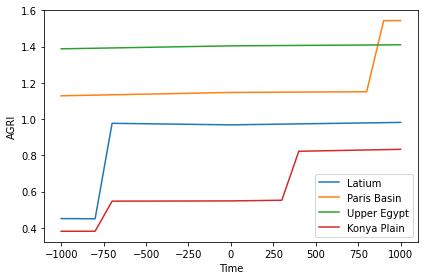

In [14]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

for region in NGA_AM:
  try:
    ax = pd.to_numeric(seshat_agri_AM[region], errors='coerce').plot()
  except: 
    pd.to_numeric(seshat_agri_AM[region], errors='coerce').plot(ax=ax)
plt.ylabel("AGRI")
plt.legend()


In [16]:
sddk.write_file("SDAM_data/seshat/agri_AM.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/seshat/agri_AM.png"


# Seshat axial age (axa)

In [17]:
seshat_axa = pd.read_csv("http://seshatdatabank.info/axialdata/data/download.csv")
seshat_axa.head(5)

,Date.From,NGA,1. Moralistic punishment,2. Moralizing norms,3. Promotion of prosociality,4. Omniscient supernatural beings,5. Rulers not gods,6. Equating elites and commoners,7. Equating rulers and commoners,8. Formal legal code,9. General applicability of law,10. Constraint on executive,11. Full-time bureaucrats,12. Impeachment,sum
0,200,Cambodian Basin,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,7.0
1,300,Cambodian Basin,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,7.0
2,400,Cambodian Basin,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,7.0
3,500,Cambodian Basin,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,7.0
4,600,Cambodian Basin,0.0,1.0,1.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,6.0


In [0]:
### backup for future usage
#sddk.write_file("SDAM_data/seshat/seshat_axa.json", seshat_axa, conf)

Your <class 'pandas.core.frame.DataFrame'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/seshat/seshat_axa.json"


In [18]:
### a subselection of most important values
values_axial = ["1. Moralistic punishment", '2. Moralizing norms', '3. Promotion of prosociality', '4. Omniscient supernatural beings']

In [19]:
### what regions do we have here?
seshat_axa["NGA"].unique()

array(['Cambodian Basin', 'Crete', 'Galilee', 'Kachi Plain', 'Kansai',
       'Konya Plain', 'Latium', 'Middle Yellow River Valley', 'Susiana',
       'Upper Egypt'], dtype=object)

In [20]:
NGA_axa_AM = ['Crete', 'Galilee', 'Konya Plain', 'Latium', 'Upper Egypt']

In [21]:
seshat_axa_AM = seshat_axa[seshat_axa["NGA"].isin(NGA_axa_AM)]
#seshat_axa_AM.set_index("Date.From", inplace=True)

In [0]:
#set_with_dataframe(sh.add_worksheet("seshat_axial_1000BC-1CE", rows=1, cols=1), seshat_axa_AM[(seshat_axa_AM["Date.From"] > -1100) & (seshat_axa_AM["Date.From"] < 100)])

In [22]:
seshat_axa_AM = seshat_axa[seshat_axa["Date.From"].isin(dates_AM)]
seshat_axa_AM.head(5)

,Date.From,NGA,1. Moralistic punishment,2. Moralizing norms,3. Promotion of prosociality,4. Omniscient supernatural beings,5. Rulers not gods,6. Equating elites and commoners,7. Equating rulers and commoners,8. Formal legal code,9. General applicability of law,10. Constraint on executive,11. Full-time bureaucrats,12. Impeachment,sum
0,200,Cambodian Basin,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,7.0
1,300,Cambodian Basin,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,7.0
2,400,Cambodian Basin,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,7.0
3,500,Cambodian Basin,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,7.0
4,600,Cambodian Basin,0.0,1.0,1.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,6.0


In [25]:
for value in values_axial:
    seshat_axa_AM[value].astype(float)

In [26]:
dates_AM

[-1000,
 -900,
 -800,
 -700,
 -600,
 -500,
 -400,
 -300,
 -200,
 -100,
 0,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000]

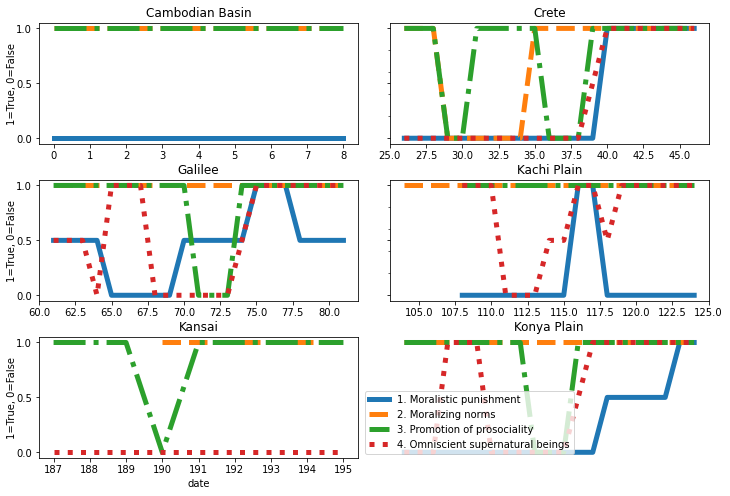

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

plt.setp(axs, yticks=[0,0.5, 1])

for ax, region in zip(axs.ravel(), seshat_axa_AM["NGA"].unique()):
  for value, ls in zip(values_axial, ['-','--','-.',':']):
    seshat_axa_AM[seshat_axa_AM["NGA"]==region][value].plot(linestyle=ls, linewidth=5, sharey=True, ax=ax)
  ax.set_title(region)
  ax.set_xlabel("")
  ax.set_ylabel("1=True, 0=False", labelpad=-1)

axs[2, 1].axis('off')
axs[2, 0].set_xlabel("date")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.75, 0.25))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

In [28]:
sddk.write_file("SDAM_data/seshat/seshat_axial_mediterranean.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/seshat/seshat_axial_mediterranean.png"
